<a href="https://colab.research.google.com/github/laerteluizf/Proc_Imagens_2025_2/blob/main/Proc_Imagens_3_Tarefa_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
from google.colab.patches import cv2_imshow

    # Exibir as imagens para comparação

def look_2(imagem_1, legenda_1, imagem_2, legenda_2):

  fig, axs = plt.subplots(1, 2, figsize=(10, 5))

  axs[0].imshow(imagem_1, cmap='gray')
  axs[0].set_title('legenda_1')
  axs[0].axis('off')

  axs[1].imshow(imagem_2, cmap='gray')
  axs[1].set_title(f'legenda_2')
  axs[1].axis('off')

  plt.tight_layout()
  plt.show()



In [ ]:
#Atividade 3 - Base de Imagens em níveis de cinza

caminho_entrada = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Color'
caminho_saida = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza'

# Lista de todos os arquivos na pasta de entrada
arquivos = os.listdir(caminho_entrada)


for nome_arquivo in arquivos:
    caminho_completo = os.path.join(caminho_entrada, nome_arquivo)

    # Verifique se o arquivo é uma imagem (usando a extensão)
    if nome_arquivo.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):

        imagem = cv2.imread(caminho_completo, 0)

        # Verifique se a imagem foi lida corretamente
        if imagem is not None:

            imagem_processada = imagem.copy()

            # Salvando a imagem processada na pasta de saída
            caminho_saida_completo = os.path.join(caminho_saida, nome_arquivo)
            cv2.imwrite(caminho_saida_completo, imagem_processada)

            print(f'Imagem processada e salva: {nome_arquivo}')

        else:
            print(f'Erro ao ler a imagem: {nome_arquivo}. O arquivo pode estar corrompido ou não ser uma imagem válida.')
    else:
        print(f'Ignorando o arquivo não-imagem: {nome_arquivo}')

print("\nProcesso concluído!")

Imagem processada e salva: carro_o_d_5.jpeg
Imagem processada e salva: carro_o_n_5.jpeg
Imagem processada e salva: carro_i_n_5.jpeg
Imagem processada e salva: carro_i_d_5.jpeg
Imagem processada e salva: escova_o_n_5.jpeg
Imagem processada e salva: escova_i_n_5.jpeg
Imagem processada e salva: escova_o_d_5.jpeg
Imagem processada e salva: escova_i_d_5.jpeg
Imagem processada e salva: flor_i_d_5.jpeg
Imagem processada e salva: flor_i_n_5.jpeg
Imagem processada e salva: flor_o_d_5.jpeg
Imagem processada e salva: flor_o_n_5.jpeg
Imagem processada e salva: chave_i_d_5.jpeg
Imagem processada e salva: chave_o_d_5.jpeg
Imagem processada e salva: chave_i_n_5.jpeg
Imagem processada e salva: chave_o_n_5.jpeg

Processo concluído!


In [ ]:


def aplicar_filtro_media(imagem_original, tamanho_kernel):

    # Verifica a imagem e se o kernel é ímpar

    if imagem_original is None:
        print("Erro: Não foi possível carregar a imagem. Verifique o caminho.")
        return

    if tamanho_kernel % 2 == 0:
        print("Erro: O tamanho do kernel deve ser um número ímpar (ex: 3, 5, 7).")
        return

    # Obter as dimensões da imagem
    altura, largura = imagem_original.shape

    # Criar uma nova matriz para a imagem de saída
    # Usamos np.zeros_like para garantir que a matriz tenha as mesmas dimensões e tipo de dado
    imagem_suavizada = np.zeros_like(imagem_original)

    # Definir o "raio" do kernel
    raio = tamanho_kernel // 2

    # Iterar sobre cada pixel da imagem menos as bordas(raios)
    for i in range(raio, altura - raio):
        for j in range(raio, largura - raio):
            # Calculo "janela" de interesse (kernel)
            vizinhos = imagem_original[i - raio : i + raio + 1, j - raio : j + raio + 1]

            # 7. Calcular a média dos valores na janela
            media_vizinhos = np.mean(vizinhos)

            # 8. Atribuir o valor da média ao pixel na nova imagem
            imagem_suavizada[i, j] = media_vizinhos

    # 9. Exibir as imagens para comparação
    #fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    #axs[0].imshow(imagem_original, cmap='gray')
    #axs[0].set_title('Imagem Original')
    #axs[0].axis('off')

    #axs[1].imshow(imagem_suavizada, cmap='gray')
    #axs[1].set_title(f'Imagem Suavizada (Kernel {tamanho_kernel}x{tamanho_kernel})')
    #axs[1].axis('off')

    #plt.tight_layout()
    #plt.show()

# --- Execução do programa ---
# Troque 'imagem_original.jpg' pelo nome do seu arquivo e defina o tamanho do kernel (3, 5, 7...)
caminho = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/carro_i_d_5.jpeg'
tamanho_kernel = 51
aplicar_filtro_media(caminho, tamanho_kernel)
#imagem1_red = imutils.resize(imagem1, height = altura_maxima)

In [ ]:
#Atividade 4 - Transformações de intensidade

def transforma_negativo(imagem):
    if imagem is None:
        print('Erro: Não foi possível carregar a imagem.')
    else:
        imagem_neg = 255 - imagem
        #imagem_red = imutils.resize(imagem_neg, height=400)

        #return imagem_red
        return imagem_neg



def transforma_logaritmica(imagem):
    if imagem is None:
        print('Erro: A imagem de entrada é None.')
        return None

    # Normalizar os valores de pixel para a faixa [0, 1]
    r_normalizado = imagem.astype(np.float32) / 255.0
    c = 1.0 / np.log(1 + np.max(r_normalizado))

    # Aplica a fórmula logarítmica
    s_log = c * np.log(1 + r_normalizado)

    # Reconverter para o formato de imagem 8-bit (0-255)
    imagem_log_final = np.uint8(s_log * 255)

    return imagem_log_final



def transforma_potencia_gama(imagem, gama):
    if imagem is None:
        print('Erro: A imagem de entrada é None.')
        return None

    # Normalizar para [0, 1] e converter para float32
    r_normalizado = imagem.astype(np.float32) / 255.0

    # Aplicar a fórmula: s = r^gama
    imagem_gama = np.power(r_normalizado, gama)

    # Reconverter para o formato de imagem 8-bit (0-255)
    imagem_gama_final = np.uint8(imagem_gama * 255)

    return imagem_gama_final










caminho_imgagem = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/carro_i_n_5.jpeg'

#img1 = cv2.imread(caminho_img1, cv2.IMREAD_COLOR)

imagem_ori = cv2.imread(caminho_imgagem)
#imagem_trans = transforma_negativo(imagem_ori)
imagem_trans = transforma_logaritmica(imagem_ori)



    # Exibir as imagens para comparação

def look_2(imagem_1, legenda_1, imagem_2, legenda_2):

  fig, axs = plt.subplots(1, 2, figsize=(10, 5))

  axs[0].imshow(imagem_1, cmap='gray')
  axs[0].set_title('legenda_1')
  axs[0].axis('off')

  axs[1].imshow(imagem_2, cmap='gray')
  axs[1].set_title(f'legenda_2')
  axs[1].axis('off')

  plt.tight_layout()
  plt.show()


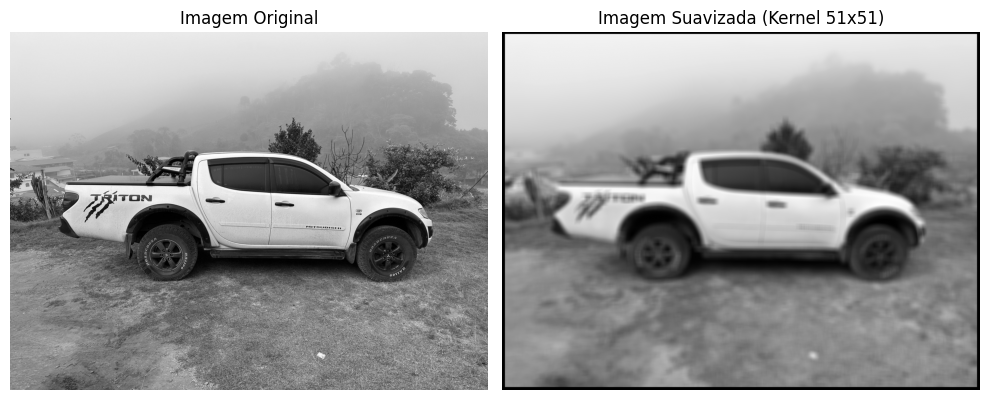

In [ ]:
#caminho_imagem = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/carro_i_d_5.jpeg'
#imagem_original = cv2.imread(caminho_imagem, cv2.IMREAD_GRAYSCALE)

#cv2_imshow(imagem_original)

def transforma_negativo(imagem):
    if imagem is None:
        print('Erro: Não foi possível carregar a imagem.')
    else:
        imagem_neg = 255 - imagem
        #imagem_red = imutils.resize(imagem_neg, height=400)

        #cv2.imshow('imagem Negantivo', imagem_red)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
        return imagem_neg



#def aplicar_filtro_media(imagem_original, tamanho_kernel):

    # Verifica a imagem e se o kernel é ímpar

    if imagem_original is None:
        print("Erro: Não foi possível carregar a imagem. Verifique o caminho.")
        return

    if tamanho_kernel % 2 == 0:
        print("Erro: O tamanho do kernel deve ser um número ímpar (ex: 3, 5, 7).")
        return

    # Obter as dimensões da imagem
    altura, largura = imagem_original.shape

    # Criar uma nova matriz para a imagem de saída
    # Usamos np.zeros_like para garantir que a matriz tenha as mesmas dimensões e tipo de dado
    imagem_suavizada = np.zeros_like(imagem_original)

    # Definir o "raio" do kernel
    raio = tamanho_kernel // 2

    # Iterar sobre cada pixel da imagem menos as bordas(raios)
    for i in range(raio, altura - raio):
        for j in range(raio, largura - raio):
            # Calculo "janela" de interesse (kernel)
            vizinhos = imagem_original[i - raio : i + raio + 1, j - raio : j + raio + 1]

            # 7. Calcular a média dos valores na janela
            media_vizinhos = np.mean(vizinhos)

            # 8. Atribuir o valor da média ao pixel na nova imagem
            imagem_suavizada[i, j] = media_vizinhos

    # 9. Exibir as imagens para comparação
    #fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    #axs[0].imshow(imagem_original, cmap='gray')
    #axs[0].set_title('Imagem Original')
    #axs[0].axis('off')

    #axs[1].imshow(imagem_suavizada, cmap='gray')
    #axs[1].set_title(f'Imagem Suavizada (Kernel {tamanho_kernel}x{tamanho_kernel})')
    #axs[1].axis('off')

    #plt.tight_layout()
    #plt.show()

# --- Execução do programa ---
# Troque 'imagem_original.jpg' pelo nome do seu arquivo e defina o tamanho do kernel (3, 5, 7...)
caminho = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/carro_i_d_5.jpeg'
tamanho_kernel = 51
#aplicar_filtro_media(caminho, tamanho_kernel)
#imagem1_red = imutils.resize(imagem1, height = altura_maxima)


In [ ]:
def adicionar_legenda(imagem, texto):
    if imagem is None:
        return None

    posicao = (10, 30)
    cor = (255, 255, 255)
    escala = 0.7
    espessura = 2
    fonte = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(imagem, texto, posicao, fonte, escala, cor, espessura, cv2.LINE_AA)

    return imagem


def adicionar_texto_no_topo(imagem, texto):
    fonte = cv2.FONT_HERSHEY_SIMPLEX
    cor = (255, 1, 255)
    escala = 1.0
    espessura = 2
    (largura_texto, altura_texto), _ = cv2.getTextSize(texto, fonte, escala, espessura)
    posicao_x = (imagem.shape[1] - largura_texto) // 2
    posicao_y = altura_texto + 15 # 15 pixels de margem do topo
    cv2.putText(imagem, texto, (posicao_x, posicao_y), fonte, escala, cor, espessura, cv2.LINE_AA)

    return imagem


def mostrar_4_imagens(imagem1, legenda1, imagem2, legenda2, imagem3, legenda3, imagem4, legenda4):
    if imagem1 is None or imagem2 is None or imagem3 is None or imagem4 is None :
        print('Erro: Não foi possível carregar a imagem.')
        print(imagem1)


    else:
        # Obtém as dimensões originais da imagem
        #imagem_gen = imagem1.copy()

        # GARANTIA DE 3 CANAIS (BGR) PARA TODAS AS IMAGES
        # Verifica se a imagem tem apenas 1 canal (escala de cinza) e a converte para 3 canais BGR
        if imagem1.ndim == 2: # .ndim == 2 significa 1 canal (altura, largura)
            imagem1 = cv2.cvtColor(imagem1, cv2.COLOR_GRAY2BGR)
        if imagem2.ndim == 2:
            imagem2 = cv2.cvtColor(imagem2, cv2.COLOR_GRAY2BGR)
        if imagem3.ndim == 2:
            imagem3 = cv2.cvtColor(imagem3, cv2.COLOR_GRAY2BGR)
        if imagem4.ndim == 2:
            imagem4 = cv2.cvtColor(imagem4, cv2.COLOR_GRAY2BGR)


        altura_maxima = 300


        imagem1_red = imutils.resize(imagem1, height = altura_maxima)
        imagem2_red = imutils.resize(imagem2, height = altura_maxima)
        imagem3_red = imutils.resize(imagem3, height = altura_maxima)
        imagem4_red = imutils.resize(imagem4, height = altura_maxima)

        #largura = imagem.shape[1]

        largura_imagem1 = imagem1_red.shape[1]
        largura_imagem2 = imagem2_red.shape[1]
        largura_imagem3 = imagem3_red.shape[1]
        largura_imagem4 = imagem4_red.shape[1]


        #imagem_red = imutils.resize(imagem_neg, height=400)



        # Adiciona legendas internas para cada sub-imagem
        posicao_legenda_interna = (10 , 30) # Posição para o canto superior esquerdo
        img1 = adicionar_legenda(imagem1_red, legenda1)
        img2 = adicionar_legenda(imagem2_red, legenda2)
        img3 = adicionar_legenda(imagem3_red, legenda3)
        img4 = adicionar_legenda(imagem4_red, legenda4)

        # Define o espaçamento
        margem = 30       # Margem nas bordas da tela final

        # Criando tela final
        largura_tela = (max(largura_imagem1, largura_imagem2, largura_imagem3, largura_imagem4) * 2) + (3 * margem)
        altura_tela = (altura_maxima * 2) + (4 * margem)

        tela_final = np.zeros((altura_tela, largura_tela, 3), dtype=np.uint8) #Tela em Preto
        #tela_final = np.ones((altura_tela, largura_tela, 3), dtype=np.uint8) * 255 #Tela em Branco

        # Calcula as posições para colar as imagens na tela
        # Offset inicial por causa da legenda externa e margem superior

        # Posições para a primeira fileira
        pos_y1 = (2 * margem) #offset_y_inicial
        #pos_x1 = margem
        pos_x1 = int(((largura_tela - margem)/ 2) - largura_imagem1)
        #pos_x2 = (2 * margem) + largura_imagem1
        pos_x2 = int((largura_tela + margem)/ 2 )

        # Posições para a segunda fileira
        pos_y2 = pos_y1 + margem + altura_maxima
        #pos_x3 = margem
        pos_x3 = int(((largura_tela - margem)/ 2) - largura_imagem1)
        #pos_x4 = (2 * margem) + largura_imagem3
        pos_x4 = int((largura_tela + margem)/ 2 )

        # Cola as imagens na tela final
        tela_final[pos_y1 : pos_y1 + altura_maxima, pos_x1 : pos_x1 + largura_imagem1] = img1
        tela_final[pos_y1 : pos_y1 + altura_maxima, pos_x2 : pos_x2 + largura_imagem2] = img2
        tela_final[pos_y2 : pos_y2 + altura_maxima, pos_x3 : pos_x3 + largura_imagem3] = img3
        tela_final[pos_y2 : pos_y2 + altura_maxima, pos_x4 : pos_x4 + largura_imagem4] = img4


        tela_final = adicionar_texto_no_topo(tela_final, 'Comparação de Imagens')

        cv2_imshow(tela_final)

        # Cria uma janela para exibir a imagem redimensionada.
        #cv2.imshow('Minha Imagem Redimensionada', imagem_redimensionada)
        #cv2.waitKey(0)  # Espera até que uma tecla seja pressionada para fechar a janela.
        #cv2.destroyAllWindows()

In [ ]:
## MUITO BOM E PRONTO ##

def converte_negativo(imagem):
    if imagem is None:
        print('Erro: Não foi possível carregar a imagem.')
    else:
        imagem_neg = 255 - imagem
        #imagem_red = imutils.resize(imagem_neg, height=400)

        #cv2.imshow('imagem Negantivo', imagem_red)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
        return imagem_neg


def histograma(imagem):
    if imagem is None:
        print('Erro: Não foi possível carregar a imagem.')
        return
    else:
        # Criação do histograma
        histo = np.zeros(256, dtype=int)
        altura_original, largura_original = imagem.shape
        for y in range(altura_original):
            for x in range(largura_original):
                valorint = imagem[y, x]
                histo[valorint] = histo[valorint] + 1

        # Parte para plotar o histograma e converter para OpenCV ---

        # Cria a figura e o gráfico com Matplotlib
        fig = plt.figure(figsize=(10, 5))
        plt.bar(range(256), histo, color='gray', width=1)
        plt.title("Histograma da Imagem")
        plt.xlabel("Nível de Cinza")
        plt.ylabel("Número de Pixels")
        plt.xlim([0, 256])

        # Renderiza o gráfico e obtém os dados do buffer
        fig.canvas.draw()

        # Usa buffer_rgba() para obter o array de pixels do gráfico
        imagem_plot_rgba = np.asarray(fig.canvas.buffer_rgba())

        # Fecha a figura do Matplotlib
        plt.close(fig)

        # Converte a ordem das cores de RGBA para BGR (OpenCV) e remove o canal alfa
        imagem_plot = cv2.cvtColor(imagem_plot_rgba, cv2.COLOR_RGBA2BGR)

        return imagem_plot



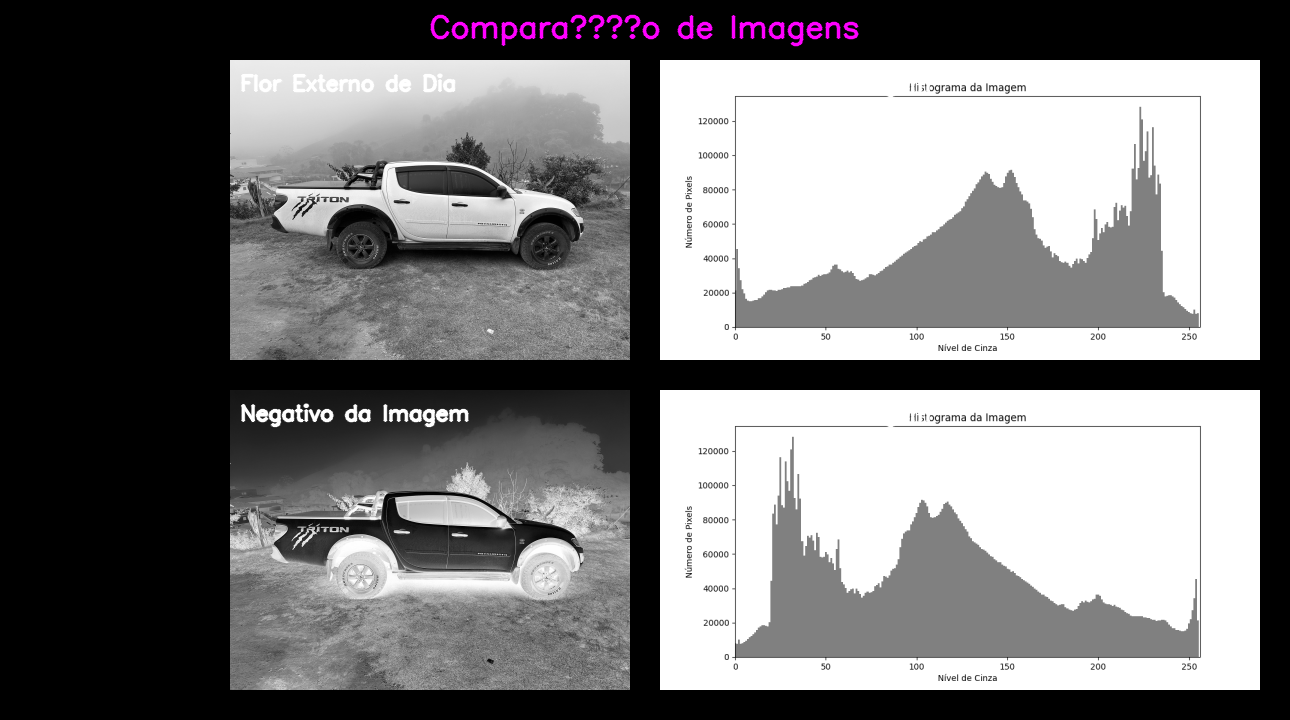

In [ ]:
#caminho_img1 = 'C:/Users/Laerte/Desktop/Proc de Imagens/carro_o_d_5.jpeg'
#caminho_img2 = 'C:/Users/Laerte/Desktop/Proc de Imagens/flor_i_d_5.jpeg'
caminho_img1 = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/carro_i_d_5.jpeg'
caminho_img2 = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/carro_i_d_5.jpeg'
#caminho_img3 = 'C:/Users/Laerte/Desktop/Proc de Imagens/flor_o_d_5.jpeg'
#caminho_img4 = 'C:/Users/Laerte/Desktop/Proc de Imagens/flor_o_d_5.jpeg'


#img1 = cv2.imread(caminho_img1, cv2.IMREAD_COLOR)

img1 = cv2.imread(caminho_img1, 0)
legenda1 = 'Flor Externo de Dia'
img2 = histograma(img1)
legenda2 = 'Histograma da Imagem'
img3 = converte_negativo(img1)
legenda3 = 'Negativo da Imagem'
img4 = histograma(img3)
legenda4 = 'Histograma da Imagem'


#img2 = cv2.imread(caminho_img2, cv2.IMREAD_COLOR)
#legenda2 = 'Carro Externo Noite'
#img3 = cv2.imread(caminho_img3, cv2.IMREAD_COLOR)
#legenda3 = 'Carro interno Dia'
#img4 = cv2.imread(caminho_img4, cv2.IMREAD_COLOR)
#legenda4 = 'Carro interno Noite'

mostrar_4_imagens(img1, legenda1, img2, legenda2, img3, legenda3, img4, legenda4)
